In [1]:
%matplotlib inline
import pandas as pd
from IPython.display import clear_output
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from sklearn.metrics import mean_absolute_error
import numpy as np 

# --------- LSTM

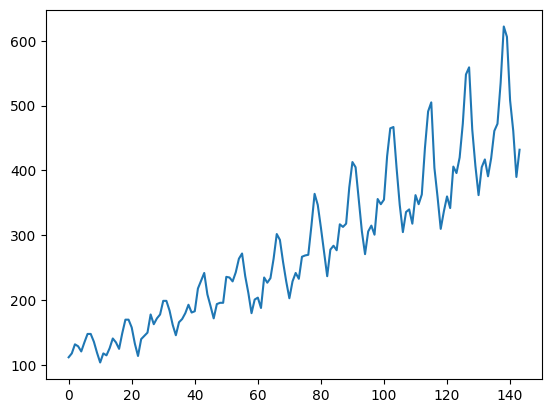

In [2]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('AirPassengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [9]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [10]:
# load the dataset
dataframe = pd.read_csv('AirPassengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [11]:
dataset.shape

(144, 1)

In [12]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [13]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [14]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [16]:

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [17]:
look_back

1

In [18]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

2023-01-28 11:03:04.777329: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
94/94 - 2s - loss: 0.0466 - 2s/epoch - 16ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0226 - 82ms/epoch - 875us/step
Epoch 3/100
94/94 - 0s - loss: 0.0169 - 85ms/epoch - 908us/step
Epoch 4/100
94/94 - 0s - loss: 0.0154 - 79ms/epoch - 841us/step
Epoch 5/100
94/94 - 0s - loss: 0.0144 - 79ms/epoch - 838us/step
Epoch 6/100
94/94 - 0s - loss: 0.0131 - 80ms/epoch - 849us/step
Epoch 7/100
94/94 - 0s - loss: 0.0120 - 79ms/epoch - 838us/step
Epoch 8/100
94/94 - 0s - loss: 0.0109 - 78ms/epoch - 830us/step
Epoch 9/100
94/94 - 0s - loss: 0.0100 - 82ms/epoch - 872us/step
Epoch 10/100
94/94 - 0s - loss: 0.0089 - 82ms/epoch - 868us/step
Epoch 11/100
94/94 - 0s - loss: 0.0079 - 80ms/epoch - 849us/step
Epoch 12/100
94/94 - 0s - loss: 0.0069 - 81ms/epoch - 858us/step
Epoch 13/100
94/94 - 0s - loss: 0.0060 - 83ms/epoch - 883us/step
Epoch 14/100
94/94 - 0s - loss: 0.0053 - 79ms/epoch - 841us/step
Epoch 15/100
94/94 - 0s - loss: 0.0046 - 78ms/epoch - 829us/step
Epoch 16/100
94/94 - 0s - loss: 0.004

In [25]:
type(trainY),type(testPredict)

(numpy.ndarray, numpy.ndarray)

In [19]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 2ms/step
Train Score: 22.81 RMSE
Test Score: 48.05 RMSE


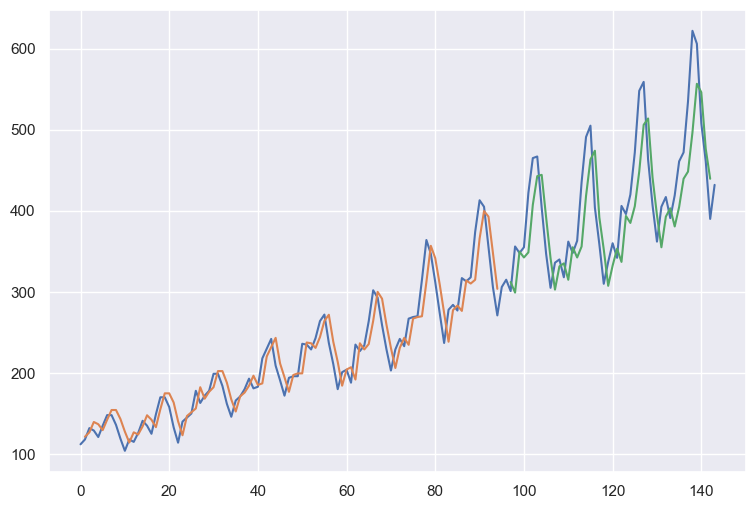

In [75]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()